Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, завдання буде оцінена максимум у половину балів.

Під час виконання вам дозволено користуватися будь-якими зручними для вас Python бібліотеками для візуалізації.

# I. Receiving Data.

In [21]:
# cell for imports. All imports must go here.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. (2б) Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою titanic ([train.csv](https://www.kaggle.com/c/titanic/data?select=train.csv)). Зчитайте його та збережіть його у змінну, щоб у подальшому її використати для візуалізацій. Виведіть інформацію про кожну колонку, її індекс, тип та кількість непропущених значень та перші кілька рядків датафрейму.


In [ ]:
titanic_df = pd.read_csv('train.csv')

print("Information about each column:")
print(titanic_df.info())

print("\nFirst few rows of the dataframe:")
print(titanic_df.head())


Information about each column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

First few rows of the dataframe:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1      

# IІ. Data Visualization.

2. (10б) Створіть pie chart, який би показував співвідношення виживших до загиблих.

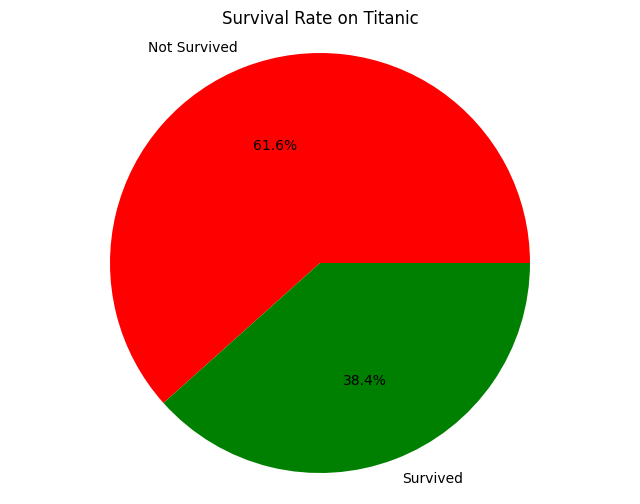

In [ ]:
survived_count = titanic_df['Survived'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(survived_count, labels=['Not Survived', 'Survived'], autopct='%1.1f%%', colors=['red', 'green'])
plt.title('Survival Rate on Titanic')
plt.axis('equal')
plt.show()


Візуалізація дозволяє легко оцінити виживаємість на Титаніку, але мало що дає крім загального розуміння. Набагато цінніше класифікувати виживших (за статтю, віком, класом) та ні, щоб виявити, які фактори пострияли виживанню.

3. (20б) Створіть bar chart, який би показував співвідношення загиблих до виживших для кожної статі. Для groupby використовуйте атрибут as_index=False.


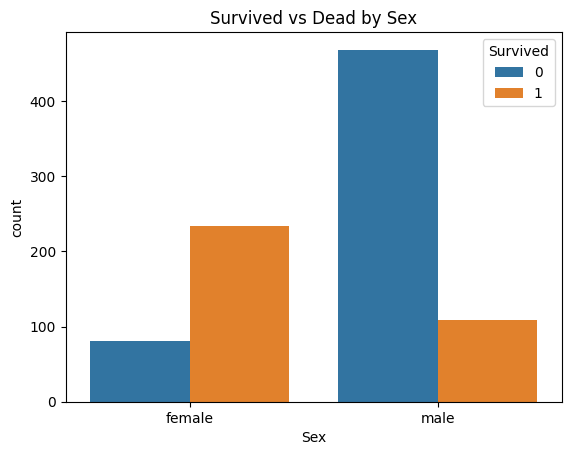

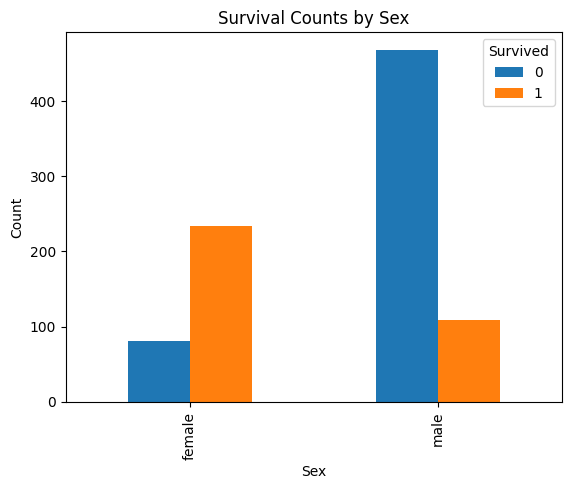

In [ ]:
survival_counts = titanic_df.groupby(['Sex', 'Survived'], as_index=False).size()

survival_counts = survival_counts.pivot(index='Sex', columns='Survived', values='size')

survival_counts.plot(kind='bar', stacked=False)

plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Survival Counts by Sex')

plt.show()

На основі діаграми ми можемо робити висновки про значущість фактора статі на виживання. Серед виживших переважна більшість жінки. Отже, можна припустити, що вони були в пріоритеті. Для порівняння можна було взяти саме відношення виживших до загальної кількості окремо для чоловіків та жінок й відобразити у секторній діаграмі, але стовпчаста діаграма дає можливість порівняти кількість жінок та чоловіків на кораблі, не тільки відсоток виживання.

4. (20б) Відобразіть кількість пропущених значень в датасеті по кожній із змінних.

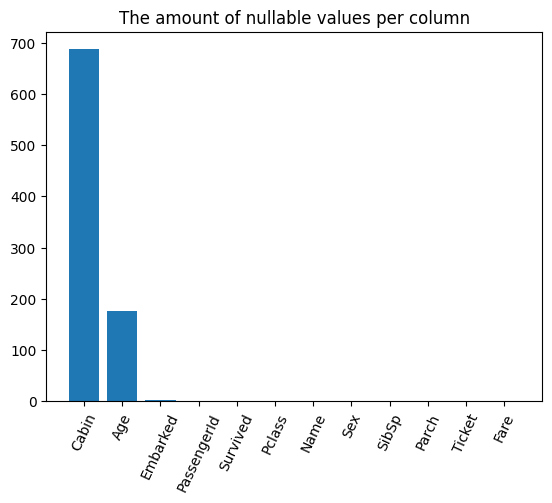

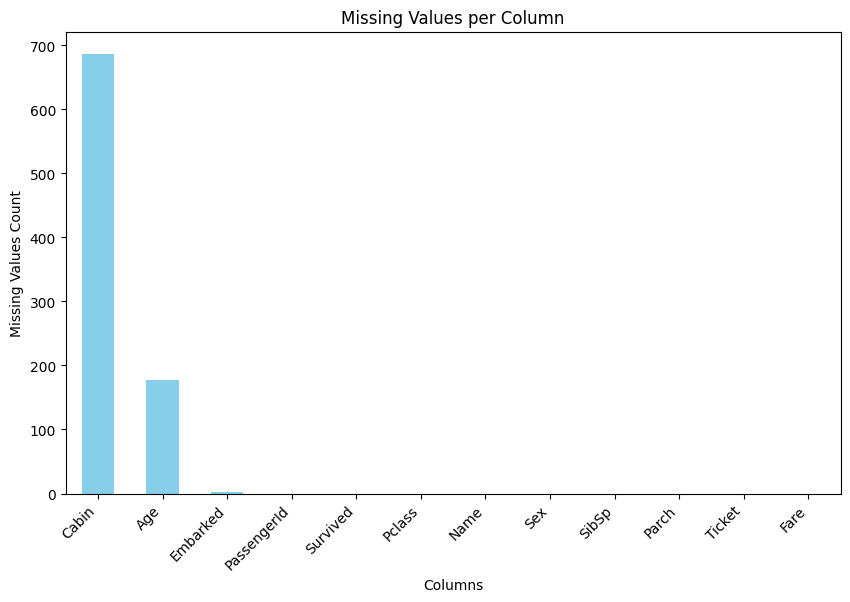

In [ ]:
missing_values = titanic_df.isna().sum()
missing_values_sorted = missing_values.sort_values(ascending=False)

missing_values_sorted.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Missing Values per Column')
plt.xlabel('Columns')
plt.ylabel('Missing Values Count')
plt.xticks(rotation=45, ha='right')
plt.show()

Ця діаграма дає зрозуміти, які дані було легше виявити, а які втрачено. Наприклад, відсутність даних про кабіни пасажирів не дозволяє виявити, які місця на кораблі були найбезпечнішими хоча б приблизно (очевидно, що не всі сидять у кабінах весь час). З іншого боку, ми знаємо, на які характеристики спиратися в аналізі даних.

5. (10б) Побудуйте наступний графік, дайте йому назву та опишіть, що власне на них відображається.

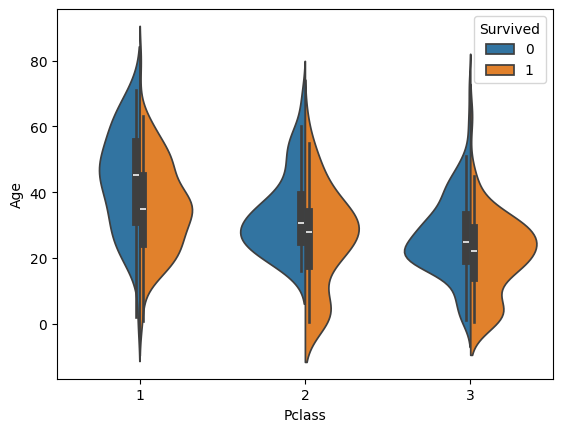

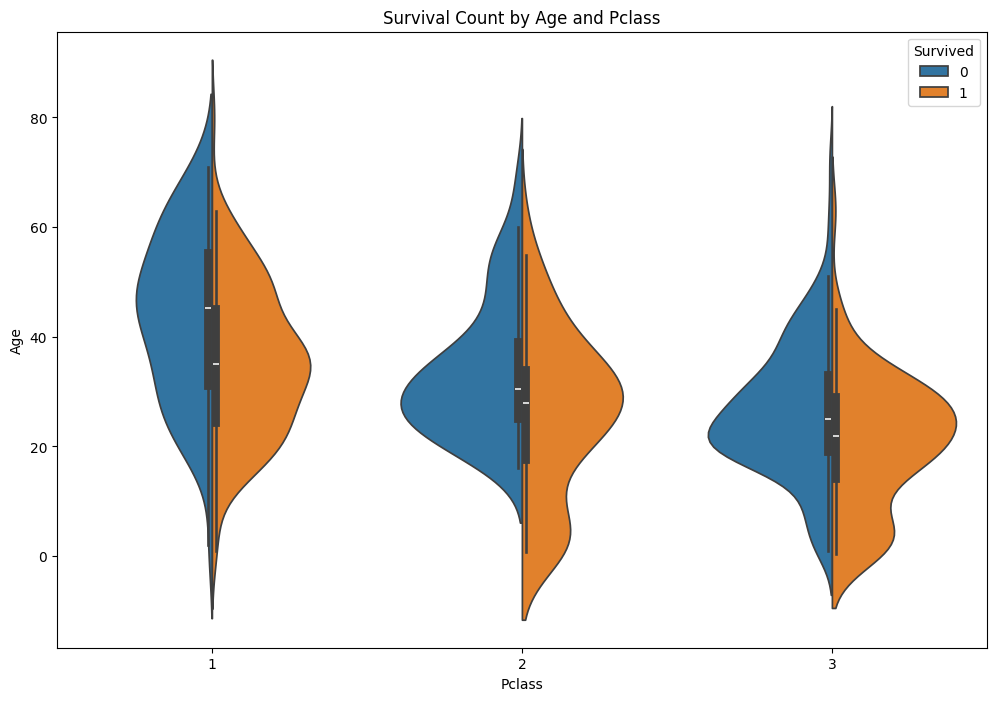

In [20]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=titanic_df, x='Pclass', y='Age', hue='Survived', split=True)
plt.title('Survival Count by Age and Pclass')
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.show()


Ця діаграма показує розподіл виживших/померлих за віком для кожного класу. називається віолончелевим графіком.

6. (13б) Побудуйте графік розподілу частот по віку пасажирів.


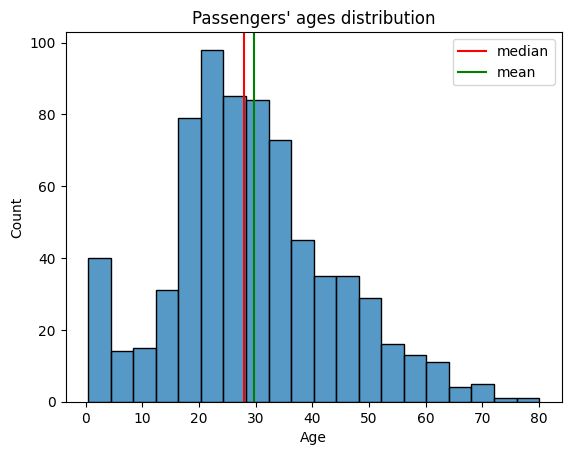

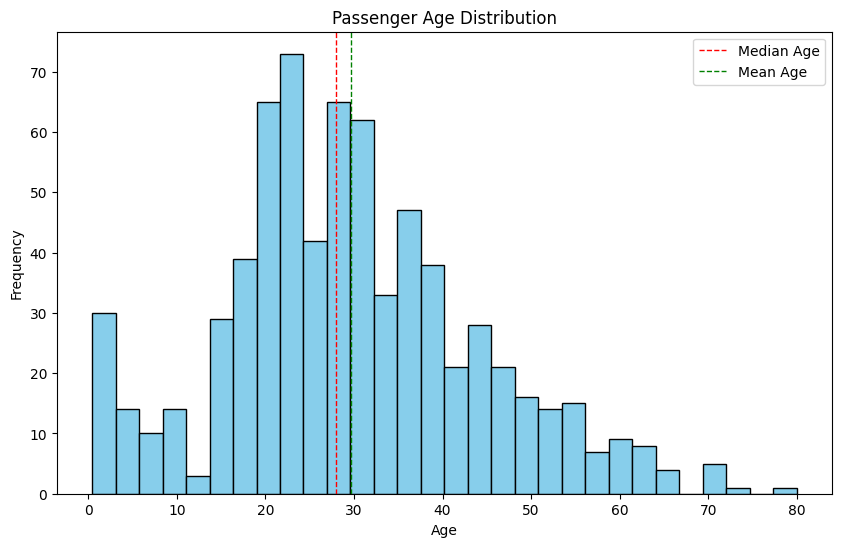

In [24]:
plt.figure(figsize=(10, 6))
plt.hist(titanic_df['Age'].dropna(), bins=30, color='skyblue', edgecolor='black')

median_age = titanic_df['Age'].median()
mean_age = titanic_df['Age'].mean()

plt.axvline(median_age, color='red', linestyle='dashed', linewidth=1, label='Median Age')
plt.axvline(mean_age, color='green', linestyle='dashed', linewidth=1, label='Mean Age')

plt.legend()
plt.title('Passenger Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

Діаграма показує розподіл віку пасажирів. Стовпець визначає вік, його висота–кількість пасажирів. Також ми маємо медіану та середнє.

7. (25б) Поставте бізнес-питання до даних. Дайте на нього відповідь за допомогою візуалізацій. Прокоментуйте отриману відповідь.

Як впливає клас пасажира на ймовірність виживання на борту Титаніка?

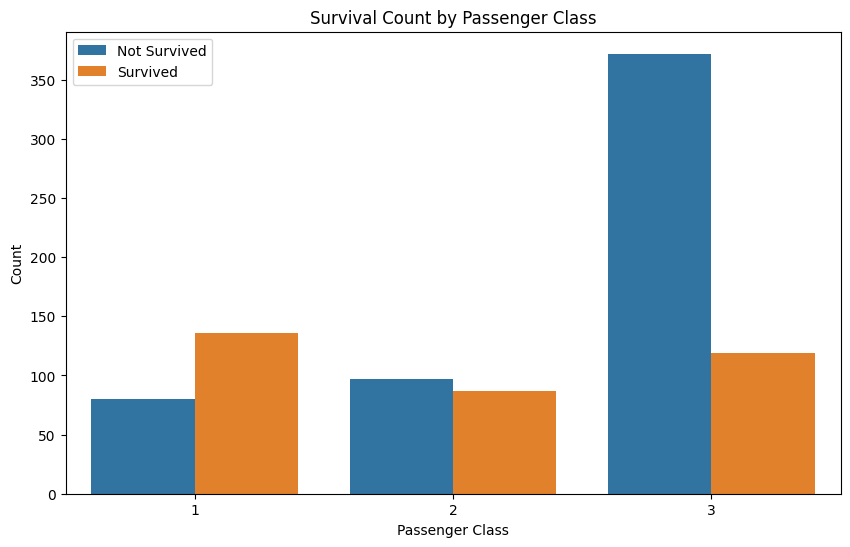

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Survived', data=titanic_df)

plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')

plt.legend(['Not Survived', 'Survived'])

plt.show()

Ця діаграма дозволяє порівняти кількість виживших/померлих для кожного класу й оцінити шанси вижити. Наприклад, на основі отриманої візуалізації, можна припустити, що клас вплинув на пріоритет порятунку пасажирів і виживших першого класу більше ніж третього.

# Вітаю! Ви велика(ий) молодець, що впоралась(вся). Похваліть себе та побалуйте чимось приємним. Я Вами пишаюся.

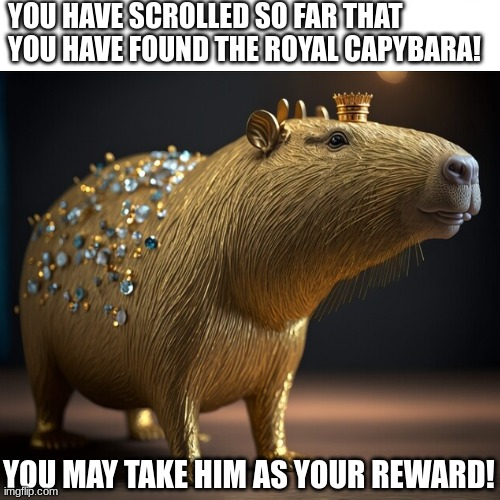